# Regression and Validation

**Name** - Lahari Mullaguru

**URN** - 6843990

**e-mail** - lm02027@surrey.ac.uk



The coursework data is available in the file named "swpg.csv" on SurreyLearn. This CSV file comprises two columns: "ftsw," which
represents the fraction of transpirable soil water, and "lfgr," which denotes the relative leaf growth. The objective is to utilize the "ftsw" variable to predict the values of "lfgr."

# Import the Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Analysis of the Dataset

In [3]:
df=pd.read_csv('swpg.csv')
df.shape

(20, 2)

The dataset contains 20 rows and two columns.

## Description of Dataset

In [4]:
df.describe()

,ftsw,lfgr
count,20.000000,20.000000
mean,0.400000,0.805269
std,0.311257,0.352534
min,0.000000,0.042851
25%,0.158333,0.713950
50%,0.300000,0.957184
75%,0.630556,1.034758
max,1.000000,1.138678


## Information about Dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ftsw    20 non-null     float64
 1   lfgr    20 non-null     float64
dtypes: float64(2)
memory usage: 452.0 bytes


In [6]:
df.isnull().sum()

ftsw    0
lfgr    0
dtype: int64

The dataset doesn't contain any null values. So, cleaning of data is not required.

In [7]:
#prints the first five rows of dataset
df.head()

,ftsw,lfgr
0,0.000000,0.042851
1,0.033333,0.064808
2,0.066667,0.222478
3,0.100000,0.419411
4,0.133333,0.500414


# Distribution of values in Dataset

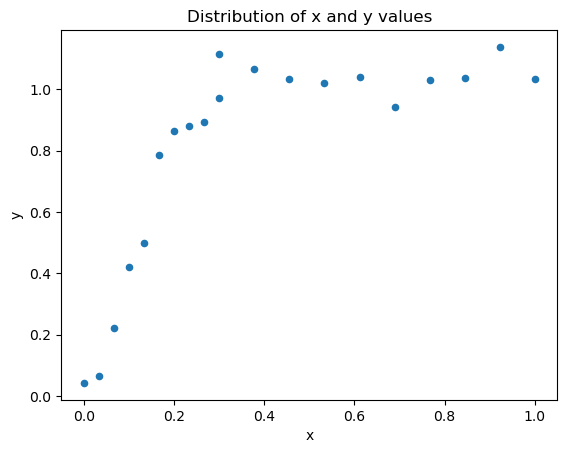

In [9]:
df.plot(x='ftsw',y='lfgr',kind='scatter')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Distribution of x and y values')
plt.show()

# TASK 1

# Linear Regression

In [10]:
x=np.array(df['ftsw'])
x= x[:, np.newaxis]
y=np.array(df['lfgr'])
print(x.shape)
print(y.shape)

(20, 1)
(20,)


### Purpose of Adding an Extra Dimension:

- When you load data from a DataFrame, a single column or row will typically be extracted as a one-dimensional array.
- The expression *x[:, np.newaxis]* transforms the array from one dimension (20,) to two dimensions (20, 1).
- This transformation ensures that the array x is not just a sequence of values but a sequence of single-element arrays, which conforms to the expected input structure for most scikit-learn estimators.

In [11]:
#Splitting the dataset
from sklearn.model_selection import train_test_split

lx_train, lx_test, ly_train, ly_test = train_test_split(x, y, test_size=0.3, random_state=42)
print(lx_train.shape)
print(ly_train.shape)

(14, 1)
(14,)


In [12]:
from sklearn.linear_model import LinearRegression

# Fitting the data in linear regression model
reg = LinearRegression().fit(lx_train, ly_train)

## Coefficients and Intercept
After fitting the model, the coefficients and the intercept can be extracted directly.

In [13]:
print("Coefficient:",reg.coef_)
print("\nIntercept:",reg.intercept_)

Coefficient: [0.6494271]

Intercept: 0.6029635418305845


### Coefficients: 
These are accessed using the **.coef_** attribute of model object. This will give an array of the coefficients for each term in the model.
### Intercept: 
This is accessed using the **.intercept_** attribute, which gives the constant term added to the sum of the weighted features.

In [14]:
# combine theta values into one array
theta = np.hstack((reg.intercept_, reg.coef_)) 
print("The minimising values of the parameters theta are ", theta)

The minimising values of the parameters theta are  [0.60296354 0.6494271 ]


In [15]:
#Prediction of test set
y_pred_lfgr= reg.predict(lx_test)
#Predicted values
print("Predictions for the test set: {}".format(y_pred_lfgr))

Predictions for the test set: [0.60296354 1.15136865 1.05034666 0.62461111 0.7761441  0.71120139]


In [16]:
#Actual value and the predicted value
reg_pred = pd.DataFrame({'Actual lfgr': ly_test, 'Predicted lfgr': y_pred_lfgr})
reg_pred

,Actual lfgr,Predicted lfgr
0,0.042851,0.602964
1,1.038437,1.151369
2,0.943869,1.050347
3,0.064808,0.624611
4,0.892240,0.776144
5,0.785129,0.711201


## Linear Regression plot

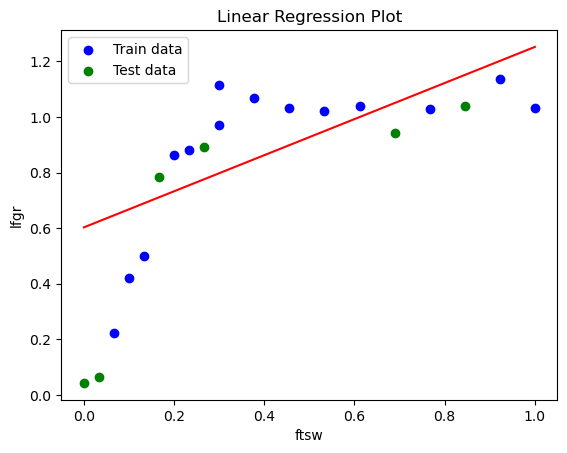

In [17]:
plt.scatter(lx_train, ly_train, color='blue', label='Train data')
plt.scatter(lx_test, ly_test, color='green', label='Test data') 

# Create a range of values for x to plot the line
x_range = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
y_range = reg.predict(x_range)

plt.plot(x_range, y_range, color='red')

plt.title('Linear Regression Plot')
plt.xlabel('ftsw')
plt.ylabel('lfgr')
plt.legend()
plt.show()

# Polynomial Regression of Degree 3

In [18]:
from sklearn.preprocessing import PolynomialFeatures

x=np.array(df['ftsw'])
x= x[:, np.newaxis]
y=np.array(df['lfgr'])

k = 3 # order of polynomial features

In [19]:
poly = PolynomialFeatures(degree=3)
poly

PolynomialFeatures(degree=3)

In [21]:
x3_train_poly = poly.fit_transform(lx_train)
x3_test_poly = poly.transform(lx_test)
print(x3_train_poly.shape)
print(x3_test_poly.shape)
#print(x_train_poly)

(14, 4)
(6, 4)


We should use the .transform() method instead of .fit_transform() for the test data. The .fit_transform() method fits the PolynomialFeatures transformation to the test data and then transforms it, which is incorrect because the transformation should be fitted only on the training data to avoid data leakage.

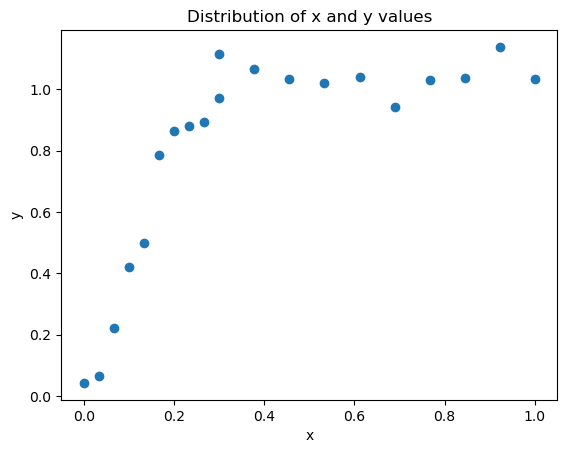

In [22]:
x_plot = poly.transform(x)
plt.scatter(x_plot[:, 1], y) 
plt.xlabel('x')
plt.ylabel('y')
plt.title('Distribution of x and y values')
plt.show()

In [23]:
# Fitting the train data

poly_reg = LinearRegression()
poly_reg.fit(x3_train_poly, ly_train)

# Predictions
y3_pred_poly = poly_reg.predict(x3_test_poly)

In [24]:
# Get coefficients and intercept
print("Coefficient:",poly_reg.coef_)
print("\nIntercept:",poly_reg.intercept_)

Coefficient: [  0.           6.61022706 -11.15527937   5.80798411]

Intercept: -0.14009257233627448


In [25]:
theta = np.hstack((poly_reg.intercept_, poly_reg.coef_)) # combine theta values into one array
print("The minimising values of the parameters theta are ", theta)

The minimising values of the parameters theta are  [ -0.14009257   0.           6.61022706 -11.15527937   5.80798411]


In [26]:
#Actual value and the predicted value
polyreg_pred = pd.DataFrame({'Actual lfgr': ly_test, 'Predicted lfgr': y3_pred_poly})
polyreg_pred

,Actual lfgr,Predicted lfgr
0,0.042851,-0.140093
1,1.038437,0.984545
2,0.943869,1.018454
3,0.064808,0.068069
4,0.892240,0.939507
5,0.785129,0.678632


## Polynomial  Regression Degree 3 Plot

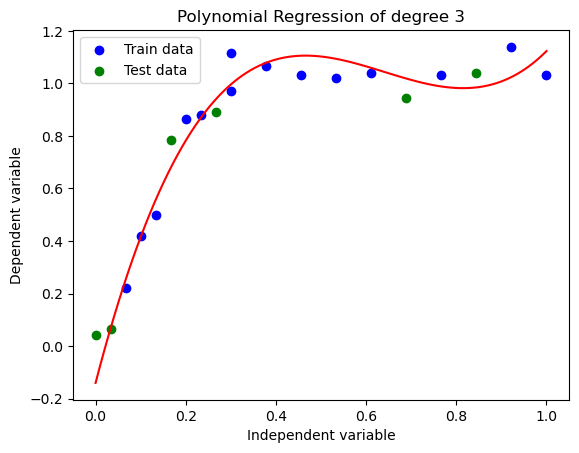

In [27]:
plt.scatter(lx_train, ly_train, color='blue', label='Train data')
plt.scatter(lx_test, ly_test, color='green', label='Test data')

# Create a range of values for x to plot the line
x_range = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
x_range_poly = poly.transform(x_range)
y_range_poly = poly_reg.predict(x_range_poly)

plt.plot(x_range, y_range_poly, color='red')

plt.title('Polynomial Regression of degree 3')
plt.xlabel('Independent variable')
plt.ylabel('Dependent variable')
plt.legend()
plt.show()

## MSE over Iterations

Test MSE: 0.1309878609240965


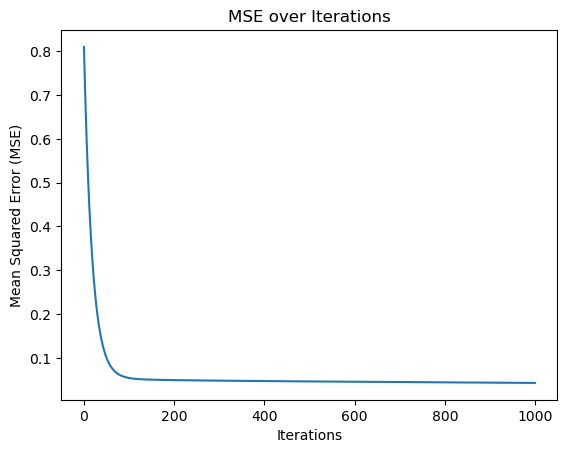

The minimum MSE is 0.04267865810730802
The final theta parameter values are [ 0.66438623  0.47132197  0.1076364  -0.05888018]


In [31]:
from sklearn.metrics import mean_squared_error

poly = PolynomialFeatures(degree=3)
x_train_poly = poly.fit_transform(lx_train)
x_test_poly = poly.transform(lx_test)

# Gradient descent parameters
theta = np.zeros(x_train_poly.shape[1])
eta = 1e-2
max_iterations = 1000
MSE_values = np.zeros(max_iterations)

# Define the gradient descent function for MSE
def gradientMSE(x_poly, y, theta):
    predictions = x_poly.dot(theta)
    errors = predictions - y
    gradient = 2 / x_poly.shape[0] * x_poly.T.dot(errors)
    return gradient

# Perform gradient descent
for i in range(max_iterations):
    theta -= eta * gradientMSE(x_train_poly, ly_train, theta)
    MSE_values[i] = mean_squared_error(ly_train, x_train_poly.dot(theta))

# Evaluation on test data
y_pred_test = x_test_poly.dot(theta)
test_mse = mean_squared_error(ly_test, y_pred_test)
print("Test MSE:", test_mse)

# Plot MSE values over iterations
plt.plot(range(max_iterations), MSE_values)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE over Iterations')
plt.show()

# Output the results
print("The minimum MSE is", np.min(MSE_values))
print("The final theta parameter values are", theta)

- The graph showing Mean Squared Error (MSE) versus the number of iterations reveals a typical learning pattern during a model's training phase. Initially, MSE drops sharply, indicating effective parameter adjustments from their starting values as the model rapidly improves in predicting the training data. This suggests an effective learning rate that enables quick error reduction.

- As the training progresses, the MSE curve flattens, signaling that the model is nearing convergence and additional iterations yield increasingly smaller improvements. This phase is critical for deciding when to stop training to prevent overfitting and unnecessary computational expenditure. The stabilization of MSE at a lower level indicates the model has likely optimized its parameters to best fit the training data.

# Polynomial Regression of Degree 9

In [32]:
x=np.array(df['ftsw'])
x= x[:, np.newaxis]
y=np.array(df['lfgr'])

k = 9 # order of polynomial features

In [33]:
poly2 = PolynomialFeatures(degree=9)
poly2

PolynomialFeatures(degree=9)

In [35]:
x9_train_poly = poly2.fit_transform(lx_train)
x9_test_poly = poly2.transform(lx_test)
print(x9_train_poly.shape)
print(x9_test_poly.shape)

(14, 10)
(6, 10)


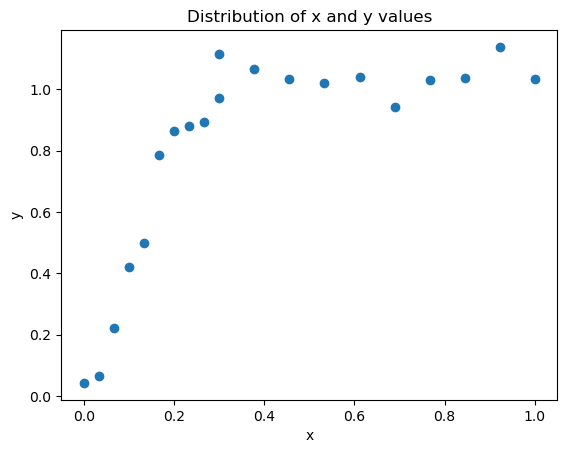

In [36]:
x_plot = poly.transform(x)
plt.scatter(x_plot[:, 1], y) 
plt.xlabel('x')
plt.ylabel('y')
plt.title('Distribution of x and y values')
plt.show()

In [37]:
# Fitting the data
poly2_reg = LinearRegression()
poly2_reg.fit(x9_train_poly, ly_train)
y9_pred_poly = poly2_reg.predict(x9_test_poly)

In [38]:
print("Coefficient:",poly2_reg.coef_)
print("\nIntercept:",poly2_reg.intercept_)

Coefficient: [ 0.00000000e+00  1.43467766e+01 -1.41354397e+02  1.08455041e+03
 -4.74575413e+03  1.18742492e+04 -1.74785287e+04  1.49671875e+04
 -6.88234803e+03  1.30902665e+03]

Intercept: -0.3418657305312447


In [39]:
theta = np.hstack((poly2_reg.intercept_, poly2_reg.coef_)) # combine theta values into one array
print("The minimising values of the parameters theta are ", theta)

The minimising values of the parameters theta are  [-3.41865731e-01  0.00000000e+00  1.43467766e+01 -1.41354397e+02
  1.08455041e+03 -4.74575413e+03  1.18742492e+04 -1.74785287e+04
  1.49671875e+04 -6.88234803e+03  1.30902665e+03]


In [40]:
#Actual value and the predicted value
polyreg_pred = pd.DataFrame({'Actual lfgr': ly_test, 'Predicted lfgr': y9_pred_poly})
polyreg_pred

,Actual lfgr,Predicted lfgr
0,0.042851,-0.341866
1,1.038437,1.060116
2,0.943869,1.039998
3,0.064808,0.014075
4,0.892240,0.995229
5,0.785129,0.683884


## Polynomial Regression Degree 9 plot

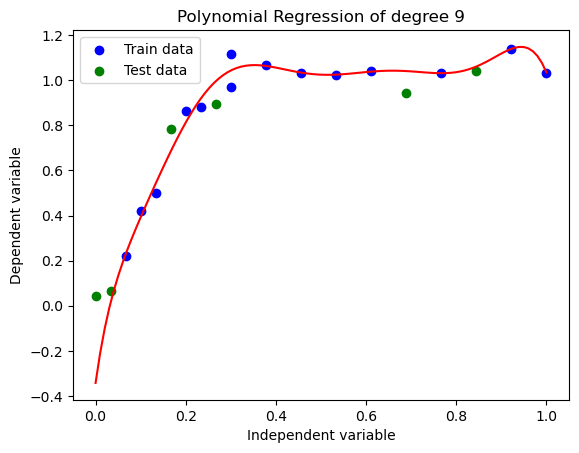

In [41]:
plt.scatter(lx_train, ly_train, color='blue', label='Train data')
plt.scatter(lx_test, ly_test, color='green', label='Test data')

# Create a range of values for x to plot the line
x_range = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
x_range_poly = poly2.transform(x_range)
y_range_poly = poly2_reg.predict(x_range_poly)

plt.plot(x_range, y_range_poly, color='red')

plt.title('Polynomial Regression of degree 9')
plt.xlabel('Independent variable')
plt.ylabel('Dependent variable')
plt.legend()
plt.show()

## MSE over Iterations

Test MSE: 0.12649898429995443


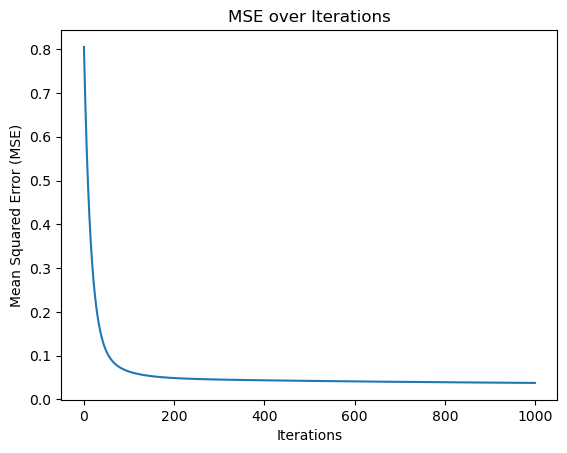

The minimum MSE is 0.03759822560430883
The final theta parameter values are [ 0.64383997  0.52717651  0.19588989  0.04486465 -0.01956614 -0.04876702
 -0.06322992 -0.07113094 -0.07591415 -0.07912216]


In [42]:
from sklearn.metrics import mean_squared_error

poly = PolynomialFeatures(degree=9)
x_train_poly = poly.fit_transform(lx_train)
x_test_poly = poly.transform(lx_test)

# Gradient descent parameters
theta = np.zeros(x9_train_poly.shape[1])
eta = 1e-2
max_iterations = 1000
MSE_values = np.zeros(max_iterations)

# Define the gradient descent function for MSE
def gradientMSE(x_poly, y, theta):
    predictions = x_poly.dot(theta)
    errors = predictions - y
    gradient = 2 / x_poly.shape[0] * x_poly.T.dot(errors)
    return gradient

# Perform gradient descent
for i in range(max_iterations):
    theta -= eta * gradientMSE(x9_train_poly, ly_train, theta)
    MSE_values[i] = mean_squared_error(ly_train, x9_train_poly.dot(theta))

# Evaluation on test data
y_pred_test = x_test_poly.dot(theta)
test_mse = mean_squared_error(ly_test, y_pred_test)
print("Test MSE:", test_mse)

# Plot MSE values over iterations
plt.plot(range(max_iterations), MSE_values)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE over Iterations')
plt.show()

# Output the results
print("The minimum MSE is", np.min(MSE_values))
print("The final theta parameter values are", theta)

# TASK 2

## Evaluation of performance using Metrics

## Linear Regression

In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error

# Predictions
y_train_pred = reg.predict(lx_train)
y_test_pred = reg.predict(lx_test)

# Calculate metrics for training data
li_mse_train = mean_squared_error(ly_train, y_train_pred)
li_rmse_train = root_mean_squared_error(ly_train, y_train_pred)
li_mae_train = mean_absolute_error(ly_train, y_train_pred)
li_r2_train = r2_score(ly_train, y_train_pred)

# Calculate metrics for testing data
li_mse_test = mean_squared_error(ly_test, y_test_pred)
li_rmse_test = root_mean_squared_error(ly_test, y_test_pred)
li_mae_test = mean_absolute_error(ly_test, y_test_pred)
li_r2_test = r2_score(ly_test, y_test_pred)

# Printing the metrics
print("Training data Metrics:")
print("MSE:", li_mse_train)
print("RMSE:", li_rmse_train)
print("MAE:", li_mae_train)
print("R-squared:", li_r2_train)

print("\nTesting data Metrics:")
print("MSE:", li_mse_test)
print("RMSE:", li_rmse_test)
print("MAE:", li_mae_test)
print("R-squared:", li_r2_test)

Training data Metrics:
MSE: 0.04078057967062276
RMSE: 0.20194202056685173
MAE: 0.17343639517068551
R-squared: 0.46607246596419594

Testing data Metrics:
MSE: 0.1116900577085899
RMSE: 0.3342006249374616
MAE: 0.25489132204288384
R-squared: 0.34449659280736955


## Explanation of metrics:
The metrics MSE, RMSE, MAE, and R-squared are standard measures used to evaluate the performance of regression models. Each metric provides a different perspective on how well the model predicts the target variable.

**1. MSE (Mean Squared Error)**

   - It measures the average of the squares of the errors between predicted and actual values.
   
   - A lower MSE indicates better model performance with less deviation from actual values. High MSE implies larger error magnitudes.
   
**2. RMSE (Root Mean Squared Error)**

   - It is the square root of MSE.
   
   - RMSE provides error magnitude in the same units as the target variable, making it more interpretable than MSE. Like MSE, a lower RMSE value indicates a better model.
   
**3. MAE (Mean Absolute Error)**

   - It measures the average of the absolute differences between predicted and actual values.
   
   - MAE gives a direct idea of the error magnitude without squaring the differences, thus not overly penalizing larger errors compared to RMSE. Lower MAE indicates better accuracy.
   
**4. R-squared (Coefficient of Determination)**

   - It measures the proportion of variance in the dependent variable that is predictable from the independent variables.
   
   - R-squared values range from 0 to 1, with higher values generally indicating a better fit of the model to the data. An R-squared of 1 means the model perfectly predicts the target variable.
   
- The training data results show moderate errors (MSE, RMSE, MAE) and a somewhat low R-squared, suggesting that the model explains less than half of the variance in the target variable. This could indicate underfitting, where the model is not complex enough to capture all the patterns in the training data.

- The test data results reveal higher errors and a lower R-squared compared to the training metrics. This further indicates that the model’s ability to generalize to unseen data is limited, confirming potential underfitting or that the model’s assumptions and features are not capturing the underlying trends effectively.

### Conclusion 
The model shows a drop in performance from training to testing, with all metrics indicating worse results on unseen data which indicates **underfitting** i.e, the model may be too simple, lacking the necessary complexity to capture the underlying relationships in the data adequately.

## Polynomial Regression of Degree 3

In [44]:
# Generate predictions
y_train_pred = poly_reg.predict(x3_train_poly)
y_test_pred = poly_reg.predict(x3_test_poly)

# Calculate Mean Squared Error (MSE)
p3_mse_train = mean_squared_error(ly_train, y_train_pred)
p3_mse_test = mean_squared_error(ly_test, y_test_pred)

# Calculate Root Mean Squared Error (RMSE)
p3_rmse_test =  root_mean_squared_error(ly_test, y_test_pred)
p3_rmse_train = root_mean_squared_error(ly_train, y_train_pred)
# Calculate Mean Absolute Error (MAE)
p3_mae_train = mean_absolute_error(ly_train, y_train_pred)
p3_mae_test = mean_absolute_error(ly_test, y_test_pred)

# Calculate R-squared
p3_r2_train = r2_score(ly_train, y_train_pred)
p3_r2_test = r2_score(ly_test, y_test_pred)

# Print metrics
print("Training Data Metrics:")
print("MSE:", p3_mse_train)
print("RMSE:", p3_rmse_train)
print("MAE:", p3_mae_train)
print("R-squared:", p3_r2_train)

print("\nTesting Data Metrics:")
print("MSE:", p3_mse_test)
print("RMSE:", p3_rmse_test)
print("MAE:", p3_mae_test)
print("R-squared:", p3_r2_test)

Training Data Metrics:
MSE: 0.00426934883681187
RMSE: 0.06534025433690835
MAE: 0.05368320418119332
R-squared: 0.9441027343213638

Testing Data Metrics:
MSE: 0.009253686627022055
RMSE: 0.09619608426033803
MAE: 0.07807437199612968
R-squared: 0.9456905723074103


- The model's performance, reflected through training and testing metrics, exhibits best accuracy and excellent generalizability. For the training data, the MSE, RMSE, and MAE are impressively low, and the R-squared value is exceptionally high at 0.9441. These metrics indicate that the model achieves a **near-perfect fit**, capturing approximately 94.41% of the variance in the training data. This indicates that the model effectively captures the underlying patterns and complexities of the training data.

- On the testing data metrics, MSE, RMSE, and MAE values are relatively low, suggesting that the model maintains good predictive accuracy on unseen data. Remarkably, the R-squared value for the test data is even higher than for the training data, at 0.9457. This suggests that the model not only performs well in a controlled training environment but also excels when applied to new datasets, thereby confirming its ability to generalize well. Such high performance on both training and testing sets indicates that the model is **well-tuned** and **best-fit**.

# Polynomial Regression of Degree 9

In [45]:
# Generate predictions
y_train_pred = poly2_reg.predict(x9_train_poly)
y_test_pred = poly2_reg.predict(x9_test_poly)

# Calculate Mean Squared Error (MSE)
p9_mse_train = mean_squared_error(ly_train, y_train_pred)
p9_mse_test = mean_squared_error(ly_test, y_test_pred)

# Calculate Root Mean Squared Error (RMSE)
p9_rmse_test =  root_mean_squared_error(ly_test, y_test_pred)
p9_rmse_train = root_mean_squared_error(ly_train, y_train_pred)
# Calculate Mean Absolute Error (MAE)
p9_mae_train = mean_absolute_error(ly_train, y_train_pred)
p9_mae_test = mean_absolute_error(ly_test, y_test_pred)

# Calculate R-squared
p9_r2_train = r2_score(ly_train, y_train_pred)
p9_r2_test = r2_score(ly_test, y_test_pred)

# Print metrics
print("Training Data Metrics:")
print("MSE:", p9_mse_train)
print("RMSE:", p9_rmse_train)
print("MAE:", p9_mae_train)
print("R-squared:", p9_r2_train)

print("\nTesting Data Metrics:")
print("MSE:", p9_mse_test)
print("RMSE:", p9_rmse_test)
print("MAE:", p9_mae_test)
print("R-squared:", p9_r2_test)

Training Data Metrics:
MSE: 0.0012211494140611334
RMSE: 0.03494494833393138
MAE: 0.022723283380213684
R-squared: 0.9840118678889547

Testing Data Metrics:
MSE: 0.03019147699157865
RMSE: 0.1737569480382832
MAE: 0.12624863797092398
R-squared: 0.8228077194857099


- For the training data, MSE, RMSE, and MAE are exceptionally low, accompanied by an extremely high R-squared value of 0.9840. These values indicate that the model provides an almost perfect fit to the training data, capturing approximately 98.4% of the variance. Such metrics suggest that the model has effectively learned the patterns and nuances of the training set, potentially to the point of **overfitting** given the very high level of fit.

- However, when evaluating the testing data metrics, there is a notable increase in error metrics (MSE, RMSE, and MAE) and a significant drop in the R-squared value to 0.8228. While an R-squared of 0.8228 still indicates a strong predictive performance, capturing about 82.28% of the variance in the test dataset, the relative increase in error metrics compared to the training data suggests that the model does not generalize as effectively to unseen data. This performance degradation could be indicative of the model **overfitting** the training data, where it learns specific details and noise not applicable to the broader dataset. This is evidenced by its high precision in training predictions and diminished accuracy in test predictions, a classic sign of overfitting in machine learning models.

# Cross-Validation

In [46]:
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import make_pipeline

X = df[['ftsw']].values  # Make sure it's a 2D array for sklearn
y = df['lfgr'].values

# Setting up KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Linear regression model
linear_scores = cross_val_score(LinearRegression(), X, y, cv=kf, scoring='r2')

# Polynomial regression model of degree 3
poly3_pipeline = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
poly3_scores = cross_val_score(poly3_pipeline, X, y, cv=kf, scoring='r2')

# Polynomial regression model of degree 9
poly9_pipeline = make_pipeline(PolynomialFeatures(degree=9), LinearRegression())
poly9_scores = cross_val_score(poly9_pipeline, X, y, cv=kf, scoring='r2')

# Print average R-squared scores for each model
print("Average R-squared for Linear Regression:", np.mean(linear_scores))
print("Average R-squared for Polynomial Regression (degree 3):", np.mean(poly3_scores))
print("Average R-squared for Polynomial Regression (degree 9):", np.mean(poly9_scores))

Average R-squared for Linear Regression: -1.3267654920587586
Average R-squared for Polynomial Regression (degree 3): 0.6555557800242481
Average R-squared for Polynomial Regression (degree 9): 0.11090151857968551


- **Overfitting Detection:** Cross-validation is more effective at detecting overfitting than a simple train-test split. When you fit a high-degree polynomial model (like degree 9), it tends to learn not just the underlying pattern but also the noise specific to your training data. This model might perform well on one particular split of the data (your test set), but when the model is evaluated across multiple different splits (as in cross-validation), the tendency to overfit becomes apparent. Each fold in cross-validation uses different subsets of data for training and testing, exposing the model to various scenarios.

- **Variability in Small Datasets:** With a small dataset, each fold in a cross-validation process might represent a significantly different statistical profile. A degree 9 polynomial model, which is highly sensitive to slight variations in data, might fit some of these folds poorly if those particular subsets of data don't represent the general trend well, resulting in lower average R-squared values across folds.

- **Generalization Capability:** Cross-validation provides a better measure of how well the model generalizes to unseen data. If cross-validation shows a lower R-squared value, it suggests that the model, despite fitting the training set very well, might not perform consistently across different sets of data.

# TASK 3

# Comparison of Regression Models

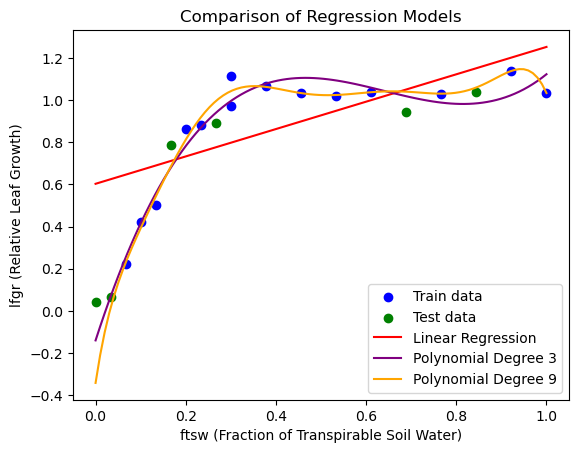

In [51]:
# Initialize polynomial features and regression models
poly = PolynomialFeatures(degree=3)
poly2 = PolynomialFeatures(degree=9)
poly_reg = LinearRegression()
poly2_reg = LinearRegression()
reg = LinearRegression()

# Degree 3 polynomial
x_train_poly3 = poly.fit_transform(lx_train)
poly_reg.fit(x_train_poly3, ly_train)

# Degree 9 polynomial
x_train_poly9 = poly2.fit_transform(lx_train)
poly2_reg.fit(x_train_poly9, ly_train)

# Linear model
reg.fit(lx_train, ly_train)


# Scatter plot of the training and testing data
plt.scatter(lx_train, ly_train, color='blue', label='Train data')
plt.scatter(lx_test, ly_test, color='green', label='Test data')

# Range of values for plotting the models' predictions
x_range = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)

# Predictions from the linear regression model
y_range_linear = reg.predict(x_range)
plt.plot(x_range, y_range_linear, color='red', label='Linear Regression')

# Transform and Predictions from the polynomial degree 3 model
x_range_poly3 = poly.transform(x_range)  # Assuming 'poly' is fitted with degree=3
y_range_poly3 = poly_reg.predict(x_range_poly3)  # 'poly_reg' is the regressor for degree 3
plt.plot(x_range, y_range_poly3, color='purple', label='Polynomial Degree 3')

# Transform and Predictions from the polynomial degree 9 model
x_range_poly9 = poly2.transform(x_range)  # Assuming 'poly2' is fitted with degree=9
y_range_poly9 = poly2_reg.predict(x_range_poly9)  # 'poly2_reg' is the regressor for degree 9
plt.plot(x_range, y_range_poly9, color='orange', label='Polynomial Degree 9')

# Plot settings
plt.title('Comparison of Regression Models')
plt.xlabel('ftsw (Fraction of Transpirable Soil Water)')
plt.ylabel('lfgr (Relative Leaf Growth)')
plt.legend()
plt.show()

### Linear Regression

- **Performance:** The linear regression model does not capture the non-linear relationship between ftsw and lfgr. The line is  straight and does not follow the evident curved trend displayed by the data points.
- **Underfitting:** This model is likely underfitting the data. Underfitting occurs when a model is too simple to capture the underlying pattern of the data. It is characterized by a high bias and low variance, leading to poor performance on both training and test data, as the model cannot account for the complexity of the data.

### Polynomial Regression Degree 3

- **Performance:** The degree 3 polynomial appears to fit the data much better than the linear model. It captures the curvature of the data points, reflecting the underlying pattern more accurately without fitting excessively to minor fluctuations or noise.
- **Good Fit:** This model strikes a good balance between bias and variance. It is complex enough to understand the underlying trends in the data without being swayed by noise. There is no apparent sign of overfitting or underfitting, as it generalizes well to the test data (assuming the green points in the plot represent test data).

### Polynomial Regression Degree 9
- **Performance:** The degree 9 polynomial fits the training data points almost perfectly, as evidenced by its path through nearly every point.
- **Overfitting:** This model is overfitting the data. Overfitting happens when a model is too complex, capturing noise and anomalies in the training data, which should not generalize to unseen data. The erratic behavior towards the extremes of the ftsw scale, especially near 1.0, is a classic indication of overfitting. Such a model will likely perform poorly on new, unseen data because it is overly tailored to the specific sample it was trained on.

### Conclusion:
Choosing the right complexity for a model is crucial. The degree 3 polynomial regression model is the most appropriate among the three for this dataset. It provides a good generalization capability, which is what predictive modeling aims for — excellent performance on unseen data. The linear model's lack of flexibility and the degree 9 model's excessive complexity demonstrate the balance that needs to be achieved for optimal machine learning model performance.

## Comparing MSE value and Degree of Regression

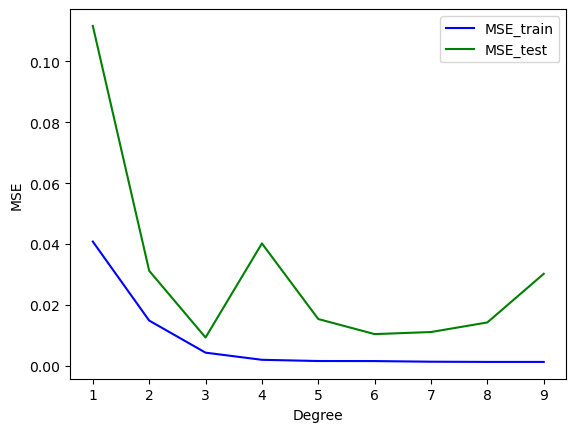

In [52]:
x=np.array(df['ftsw'])
y=np.array(df['lfgr'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Function to compute MSE
def MSE(X, y, theta):
    predictions = X.dot(theta[1:]) + theta[0]
    return np.mean((y - predictions) ** 2)

# Function to fit and evaluate polynomial regression
def FitAndEvaluate(degree):
    poly = PolynomialFeatures(degree)
    X_train = poly.fit_transform(x_train[:, np.newaxis])
    X_test = poly.transform(x_test[:, np.newaxis])
    
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)
    
    theta = np.hstack((lin_reg.intercept_, lin_reg.coef_))
    return MSE(X_train, y_train, theta), MSE(X_test, y_test, theta)

# Initialize variables for the maximum degree
max_degree = 10
MSE_train = np.zeros(max_degree - 1)
MSE_test = np.zeros(max_degree - 1)

# Calculate MSE for each polynomial degree
for degree in range(1, max_degree):
    MSE_train[degree - 1], MSE_test[degree - 1] = FitAndEvaluate(degree)

# Plotting the results
fig, ax = plt.subplots(1, 1)
degree_range = range(1, max_degree)
ax.plot(degree_range, MSE_train, 'b', label='MSE_train')
ax.plot(degree_range, MSE_test, 'g', label='MSE_test')
ax.set_xticks(degree_range)
ax.set_xlabel('Degree')
ax.set_ylabel('MSE')
ax.legend()
plt.show()

### Observations:

- **Training MSE:** The MSE for the training data generally decreases as the degree of the polynomial increases. This is expected as more complex models can fit the training data better, capturing more of its nuances and reducing error.
- **Testing MSE:** The MSE for the testing data also decreases initially as the model complexity increases but shows a different trend as the degree goes beyond 3.

### Optimal Point (Degree 3):

The testing MSE decreases initially, reaching a minimum at degree 3, and then increases, dips slightly at degree 6, and begins rising again. This suggests that a polynomial of degree 3 is potentially the optimal complexity for this dataset as it provides the best generalization before the model starts to overfit.

### Overfitting Beyond Optimal Degree:

Beyond degree 3, the MSE for the testing data starts to increase despite further decreases or steadiness in the training MSE. This is indicative of overfitting, where the model starts to learn not only the underlying data patterns but also the noise specific to the training set. This does not generalize well, hence the increase in MSE when the model is applied to the test set.
Notably, the dip in MSE at degree 6 might suggest a temporary alignment where the model's complexity captures some broader patterns that are also present in the test data but rises again as the model complexity continues to increase.

### Underfitting at Very Low Degrees:

At degree 1 (and to some extent, degree 2), both the training and testing MSEs are relatively high compared to more complex models, indicating underfitting. The model is too simple to capture the necessary patterns in the data.

# TASK 4

# Comparison of Regression models by metrics

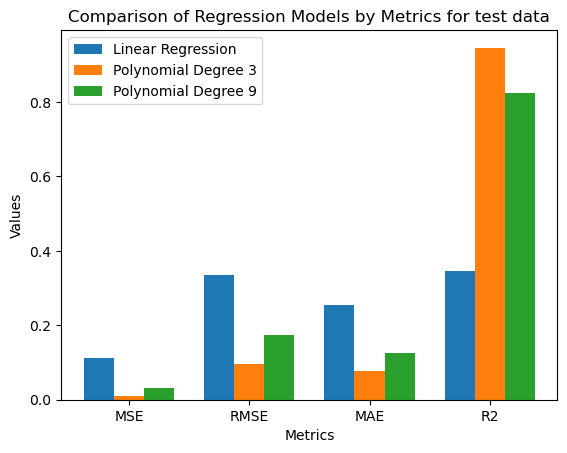

In [53]:
# values of metrics

metrics = {
    'Linear Regression': {'MSE': li_mse_test, 'RMSE': li_rmse_test, 'MAE': li_mae_test, 'R2': li_r2_test},
    'Polynomial Degree 3': {'MSE': p3_mse_test, 'RMSE': p3_rmse_test, 'MAE': p3_mae_test, 'R2': p3_r2_test},
    'Polynomial Degree 9': {'MSE': p9_mse_test, 'RMSE': p9_rmse_test, 'MAE': p9_mae_test, 'R2': p9_r2_test}
}

# Prepare the metric names from any one of the entries
metric_names = list(metrics['Linear Regression'].keys())
n_groups = len(metric_names)
index = np.arange(n_groups)
bar_width = 0.25

fig, ax = plt.subplots()

# Plot each set of metrics
for i, (model_name, model_metrics) in enumerate(metrics.items()):
    bar_positions = index + i * bar_width
    metric_values = [model_metrics[metric] for metric in metric_names]
    ax.bar(bar_positions, metric_values, bar_width, label=model_name)

# Add some text for labels, title, and axes ticks
ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Comparison of Regression Models by Metrics for test data')
ax.set_xticks(index + bar_width)  # Adjust this if needed to center labels
ax.set_xticklabels(metric_names)
ax.legend()

plt.show()

- The Linear Regression model shows relatively higher MSE, RMSE, and MAE values, suggesting it is less accurate than the polynomial models, likely due to its inability to capture the more complex patterns in the data. The Polynomial Degree 3 model, on the other hand, demonstrates significantly better performance on these error metrics, indicating a more accurate fit on the dataset, which typically points to an effective balance between model complexity and performance.

- The Polynomial Degree 9 model, while achieving similar low error metrics, stands out with a very high R-squared value nearly reaching 0.9, suggesting that it explains almost all the variability in the predicted variable. However, the closeness of R2 to 1, especially when combined with lower MSE, RMSE, and MAE values, could also indicate potential overfitting where the model fits the training data exceedingly well but may not perform similarly on unseen data. Thus, while the Polynomial Degree 9 model appears to be the most precise in terms of error reduction and data variance explanation, it might be overly complex, risking overfitting compared to the more balanced Polynomial Degree 3 model.